<center><h1> Mushroom Classification - Edible or Inedible</h1></center>

<img src="https://i.ytimg.com/vi/PUJVqwnMH7A/maxresdefault.jpg" height="500" width="800">



The main idea is to apply 6 supervised machine learning classification models and an ANN model on the given dataset to classify mushrooms as Inedible (poisonous) or edible (eatable).
1. Logistic Regression
2. Support Vector machines (SVC)
3. K-Nearest Neighbours(K-NN)
4. Naive Bayes classifier
5. Decision Tree Classifier
6. Random Forest Classifier
7. Artificial Neural Networks

The clasification process will be performed by first by converting categorical variables into dummy/indicator variables, then reducing dimensions using Princple Component Analysis to reduce 23 categorical variables (which will become 95 variables after conversion)
to only 2 variables (Principle Components) and training different classification models over these two principle components. Finally, I'll visualize the outputs so that decision boundaries of different models can be seen in 2D-plane. Here the preference is not given to accuracy as the goal is to visualize the decision boundaries. For greater accuracy one can choose more than two 

### Let's Import SOme Needed Libraries

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Importing the Dataset

In [2]:

dataset=pd.read_csv("/resources/data/mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Checking for null data in the dataset

In [3]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Lets look at some basic statistics of the data

In [4]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Class column is response and rest columns are predictors.
### Seprating Predictors and Response

In [5]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [6]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

### Encoding categorical data
### Label encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])

In [8]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [9]:
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

From the class or y output, since we have a binary result, we will assign  Inedible = 1 and Edible = 0

### Now lets conver the predictor viariables into dummy variables

In [10]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Lets scale and transform the test and train data

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA with  n_components = 2

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Functions to visualize Training & Test Set Results.

In [14]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

# Artificial Neural Networks (ANN)

In [15]:
!pip install keras
import keras
from keras.models import Sequential
from keras.layers import Dense

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


## Initializing ANN

In [16]:
classifier = Sequential()

## Adding Layers

In [17]:
classifier.add(Dense(8, kernel_initializer='uniform', activation= 'relu', input_dim = 2))
classifier.add(Dense(6, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(4, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])

## Fitting ANN to Training Set

In [18]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
6499/6499 [==============================] - 2s 374us/step - loss: 0.6930 - acc: 0.5125
Epoch 2/100
6499/6499 [==============================] - 1s 220us/step - loss: 0.6928 - acc: 0.5147
Epoch 3/100
6499/6499 [==============================] - 2s 250us/step - loss: 0.6928 - acc: 0.5147
Epoch 4/100
6499/6499 [==============================] - 2s 240us/step - loss: 0.6928 - acc: 0.5147
Epoch 5/100
6499/6499 [==============================] - 2s 273us/step - loss: 0.6928 - acc: 0.5147
Epoch 6/100
6499/6499 [==============================] - 2s 318us/step - loss: 0.6928 - acc: 0.5147
Epoch 7/100
6499/6499 [==============================] - 2s 274us/step - loss: 0.6928 - acc: 0.5147
Epoch 8/100
6499/6499 [==============================] - 2s 252us/step - loss: 0.6927 - acc: 0.5147
Epoch 9/100
6499/6499 [==============================] - 2s 295us/step - loss: 0.6928 - acc: 0.5147
Epoch 10/100
6499/6499 [==============================] - 2s 260us/step - loss: 0.6928 - acc: 0.5147

###  Predicting the test result

In [19]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

### Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
ann_confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

[[863   0]
 [762   0]]


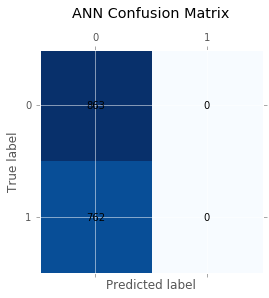

In [21]:
# visualize the confusion matrix
plt.matshow(ann_confusion_matrix, cmap = plt.cm.Blues)
plt.title("ANN Confusion Matrix\n")
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(ann_confusion_matrix.shape[0]):
    for x in range(ann_confusion_matrix.shape[1]):
        plt.text(x, y, '{}'.format(ann_confusion_matrix[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

### Classification report

In [22]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.53      1.00      0.69       863
          1       0.00      0.00      0.00       762

avg / total       0.28      0.53      0.37      1625



## Visualizing ANN Training Set results

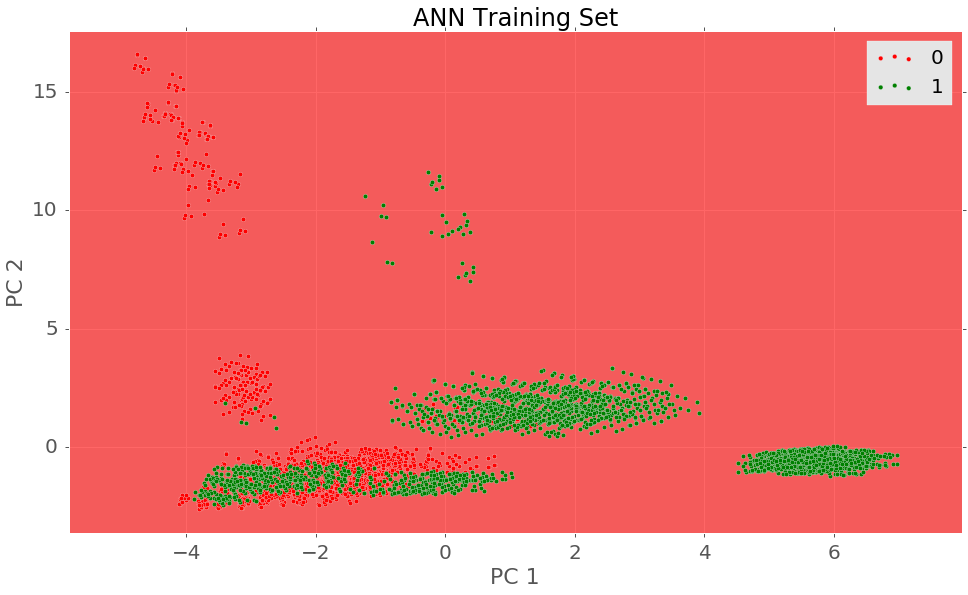

In [23]:
visualization_train(model='ANN')

## Visualizing ANN Training Set results

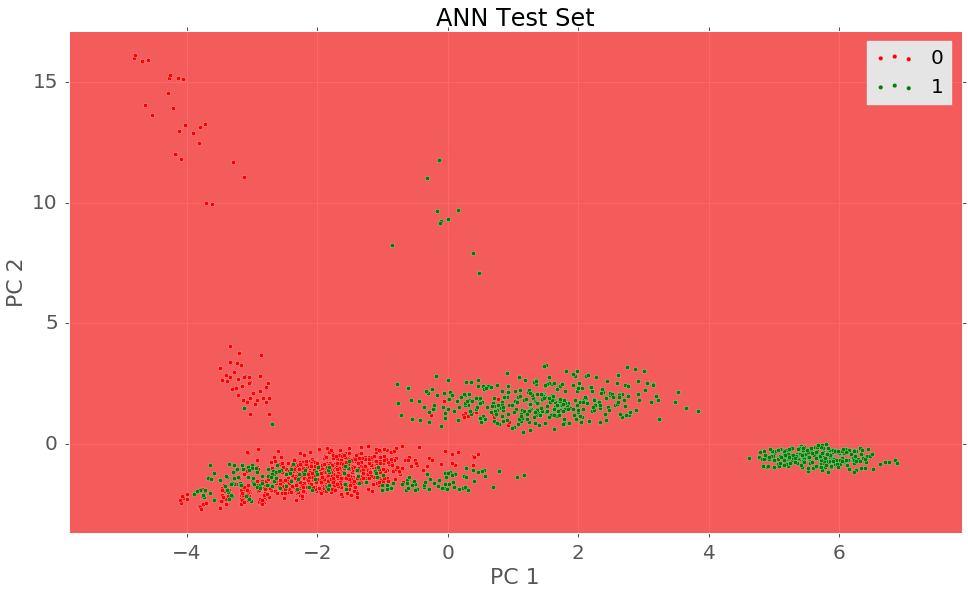

In [24]:
visualization_test(model='ANN')

### Creating a func to evaluate model's performance.

In [25]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Creating a func to evaluate model's performance.

In [26]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

# Logistic Regression Model
## Fitting Logistic Regression model to the Training set

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Logistic Regression Training Results

In [28]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9054

Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.97      0.91      3345
          1       0.96      0.84      0.90      3154

avg / total       0.91      0.91      0.90      6499


Confusion Matrix:
[[3229  116]
 [ 499 2655]]

Average Accuracy:	0.9057

Standard Deviation:	0.0056


### Logistic Regression Testing Results

In [29]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8991

Classification Report:
             precision    recall  f1-score   support

          0       0.86      0.96      0.91       863
          1       0.95      0.83      0.89       762

avg / total       0.90      0.90      0.90      1625


Confusion Matrix:
[[829  34]
 [130 632]]



## Visualising the Logistic Regression Training set results

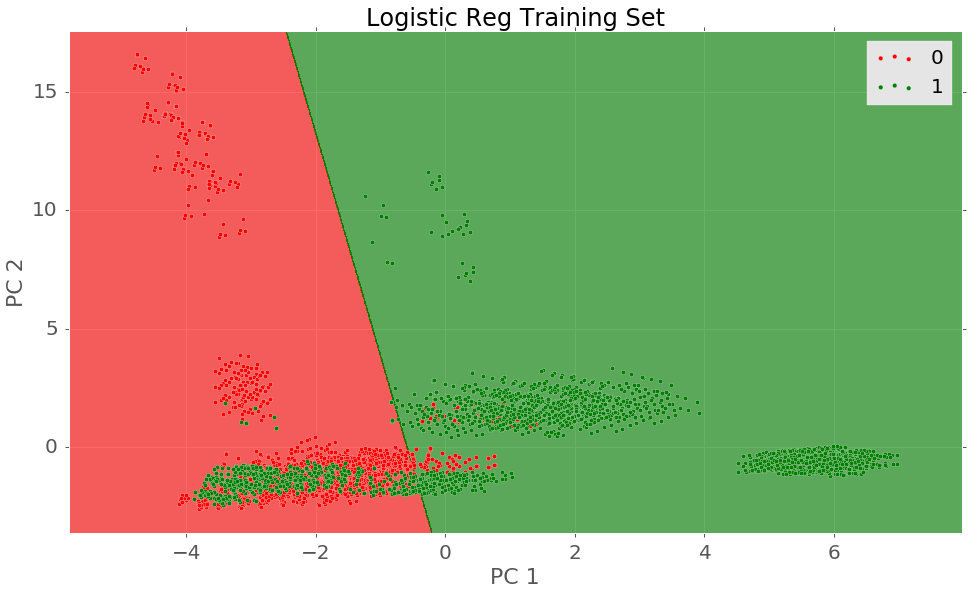

In [30]:
visualization_train('Logistic Reg')

## Visualising the Logistic Regression Training set results

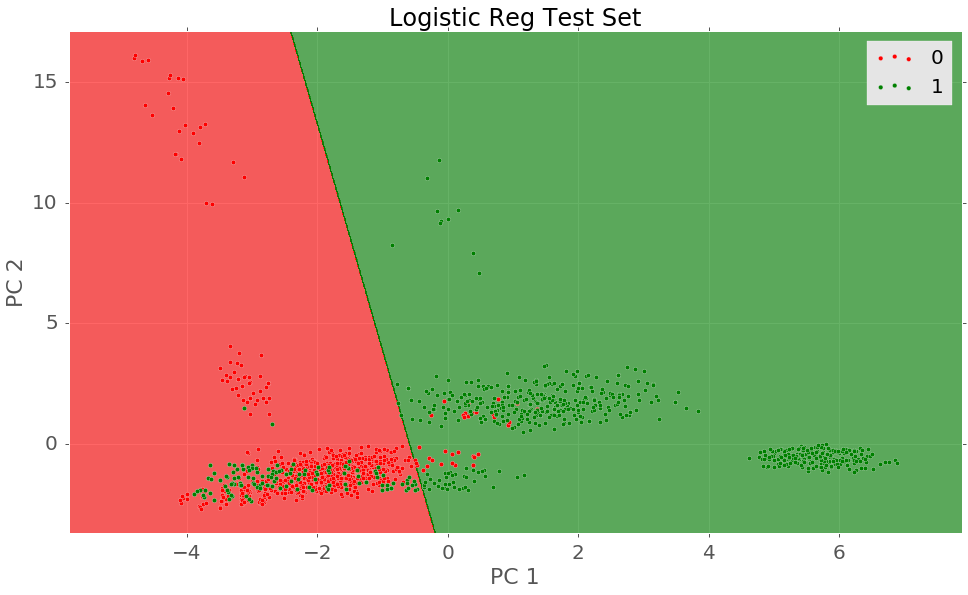

In [31]:
visualization_test('Logistic Reg')

# Support Vecor (SVC) Classification Model
## Fitting SVC to the Training set

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

## SVC Training Results

In [33]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9280

Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.98      0.93      3345
          1       0.97      0.88      0.92      3154

avg / total       0.93      0.93      0.93      6499


Confusion Matrix:
[[3265   80]
 [ 388 2766]]

Average Accuracy:	0.9275

Standard Deviation:	0.0036


## SVC Testing Results

In [34]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9249

Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.97      0.93       863
          1       0.97      0.87      0.92       762

avg / total       0.93      0.92      0.92      1625


Confusion Matrix:
[[841  22]
 [100 662]]



## Visualizing the SVC Training set results

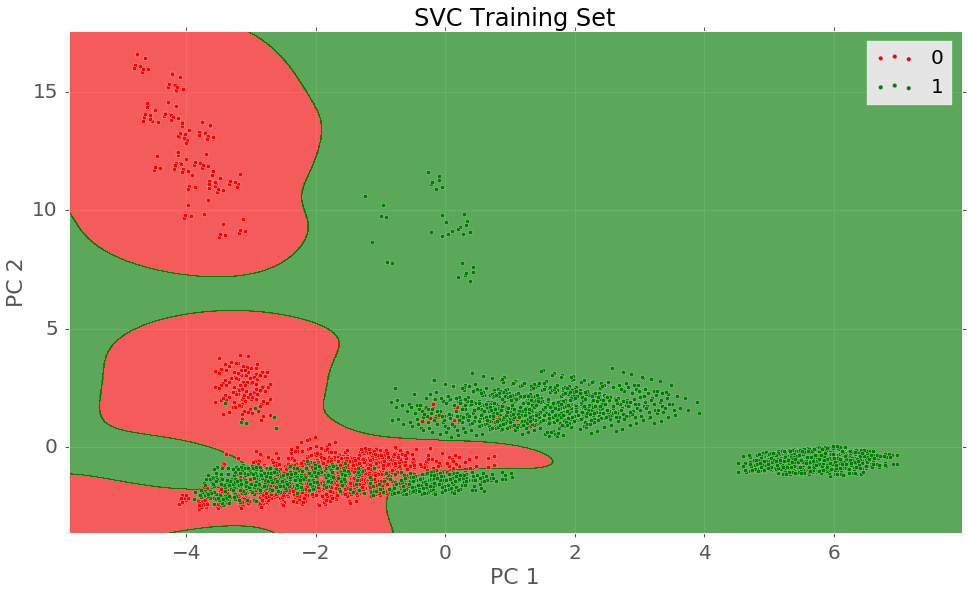

In [35]:
visualization_train('SVC')

## Visualizing the SVC Testing set results

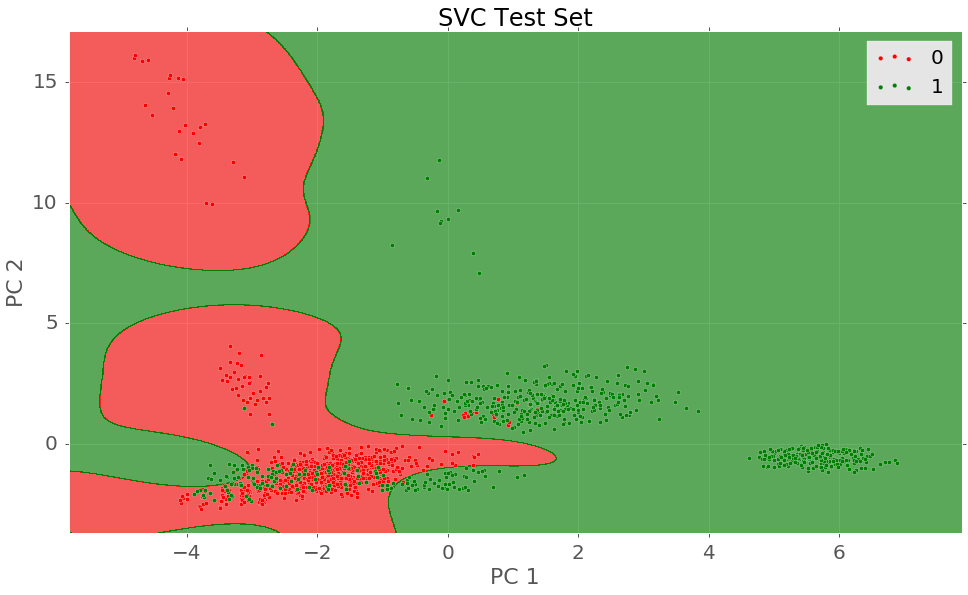

In [36]:
visualization_test('SVC')

# K Nearest Neighbors (K-NN) Classification Model
## Fitting K-NN to the Training set

In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Now let's find the best k value

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.932923076923077 with k= 9


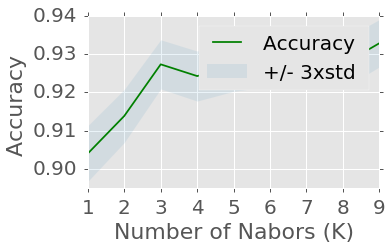

In [39]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

## K-NN Training  Results

In [40]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9394

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      3345
          1       0.96      0.91      0.94      3154

avg / total       0.94      0.94      0.94      6499


Confusion Matrix:
[[3237  108]
 [ 286 2868]]

Average Accuracy:	0.9272

Standard Deviation:	0.0077


## K-NN Testing  Results

In [41]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9268

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.96      0.93       863
          1       0.95      0.89      0.92       762

avg / total       0.93      0.93      0.93      1625


Confusion Matrix:
[[828  35]
 [ 84 678]]



## Visualising the K-NN Training set results

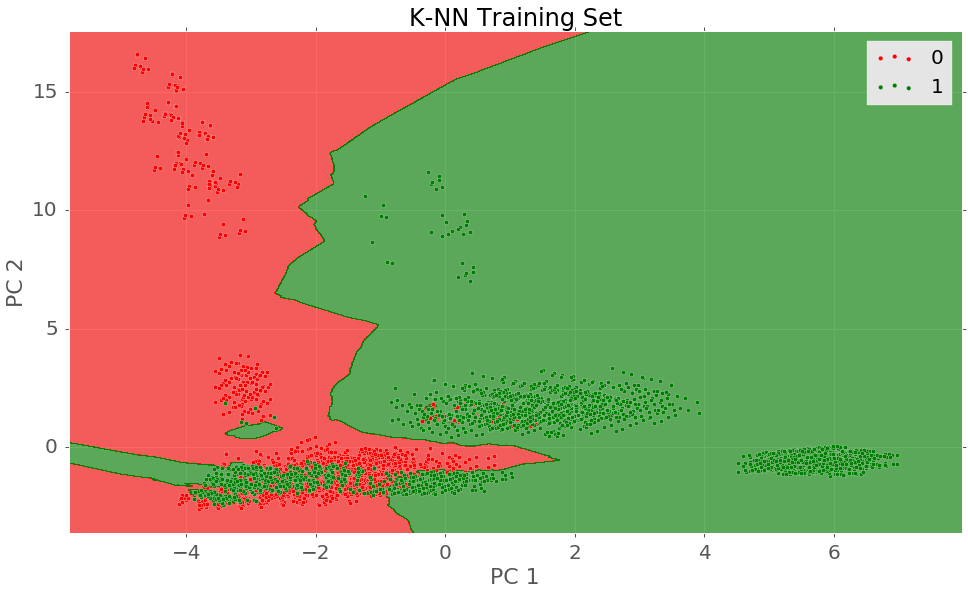

In [42]:
visualization_train('K-NN')

## Visualising the K-NN Testing set results

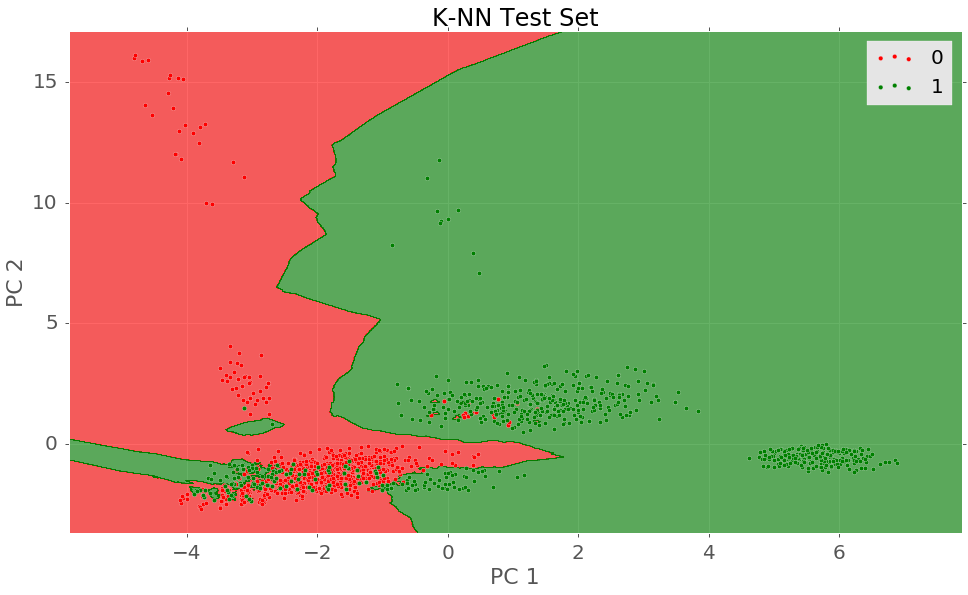

In [43]:
visualization_test('K-NN')

# Decision Tree Classification Model
## Fitting Decision Tree classifier to the Training set

In [44]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=4)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

## Decision Tree Training Results

In [45]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3345
          1       1.00      1.00      1.00      3154

avg / total       1.00      1.00      1.00      6499


Confusion Matrix:
[[3345    0]
 [   0 3154]]

Average Accuracy:	0.8998

Standard Deviation:	0.0110


## Decision Tree Testing Results

In [46]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9034

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.91      0.91       863
          1       0.90      0.90      0.90       762

avg / total       0.90      0.90      0.90      1625


Confusion Matrix:
[[785  78]
 [ 79 683]]



## Visualising the Decision tree Training set results

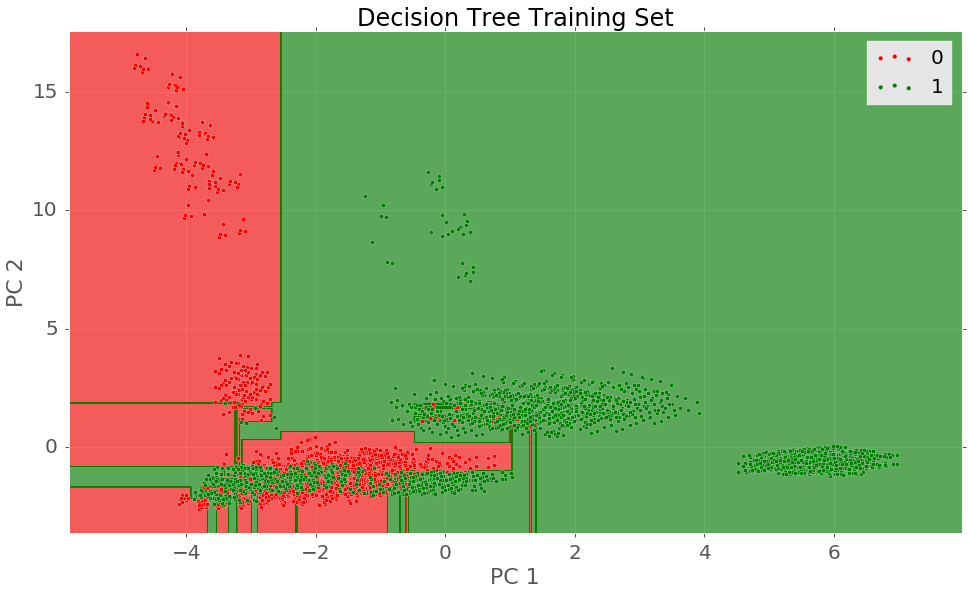

In [47]:
visualization_train('Decision Tree')

## Visualising the Decision tree Testing set results

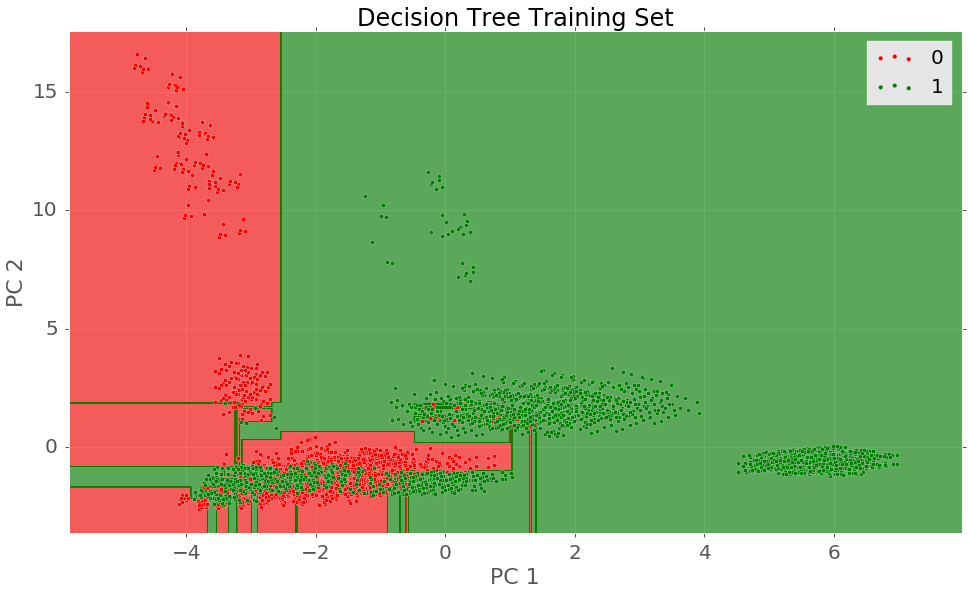

In [48]:
visualization_train('Decision Tree')

# Naive Bayes Classification Model
## Fitting Naive Bayes classifier to the Training set

In [49]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

## Naive Bayes Training Results

In [50]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8971

Classification Report:
             precision    recall  f1-score   support

          0       0.86      0.96      0.91      3345
          1       0.95      0.83      0.89      3154

avg / total       0.90      0.90      0.90      6499


Confusion Matrix:
[[3218  127]
 [ 542 2612]]

Average Accuracy:	0.8971

Standard Deviation:	0.0044


## Naive Bayes Test Results

In [51]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8880

Classification Report:
             precision    recall  f1-score   support

          0       0.85      0.96      0.90       863
          1       0.95      0.81      0.87       762

avg / total       0.89      0.89      0.89      1625


Confusion Matrix:
[[828  35]
 [147 615]]



## Visualising the Naive Bayes Training set results

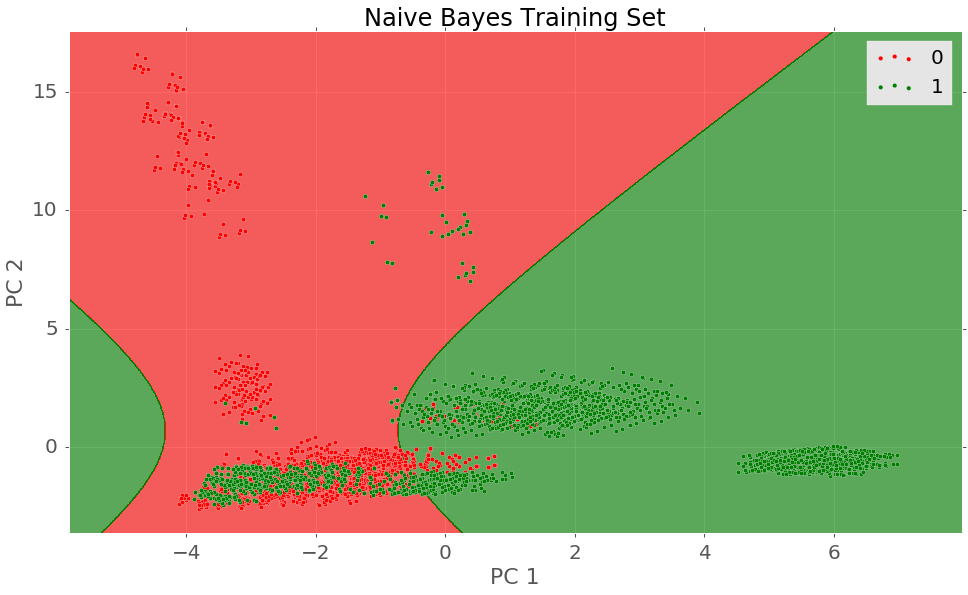

In [52]:
visualization_train('Naive Bayes')

## Visualising the Naive Bayes Testing set results

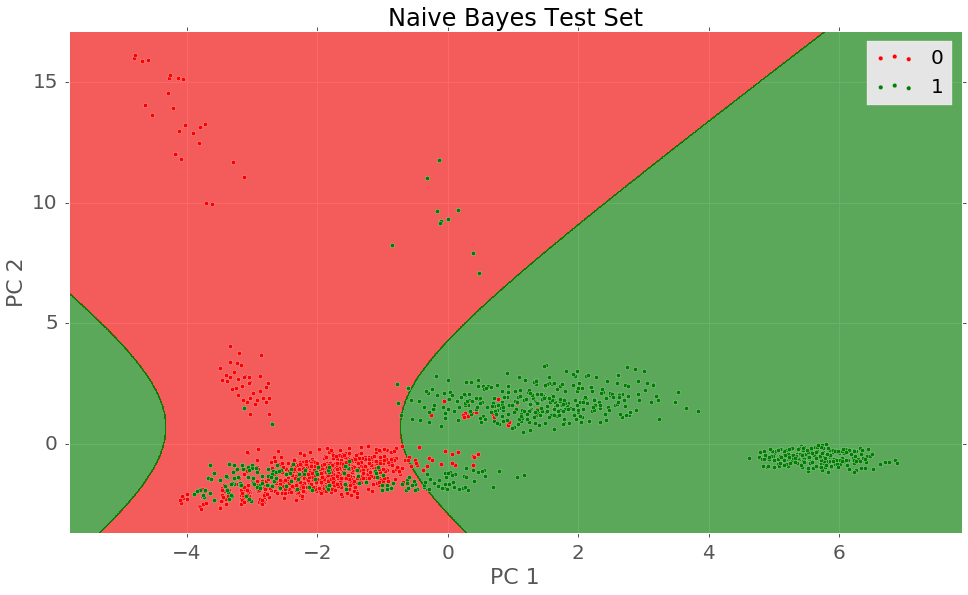

In [53]:
visualization_test('Naive Bayes')

# Random Forest Classification Model
## Fitting Random Forest classifier to the Training set

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Random Forest Training Results

In [55]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9983

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3345
          1       1.00      1.00      1.00      3154

avg / total       1.00      1.00      1.00      6499


Confusion Matrix:
[[3344    1]
 [  10 3144]]

Average Accuracy:	0.9249

Standard Deviation:	0.0077


## Random Forest Testing Results

In [56]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9262

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       863
          1       0.95      0.89      0.92       762

avg / total       0.93      0.93      0.93      1625


Confusion Matrix:
[[824  39]
 [ 81 681]]



## Visualising the Random Forest Training set results

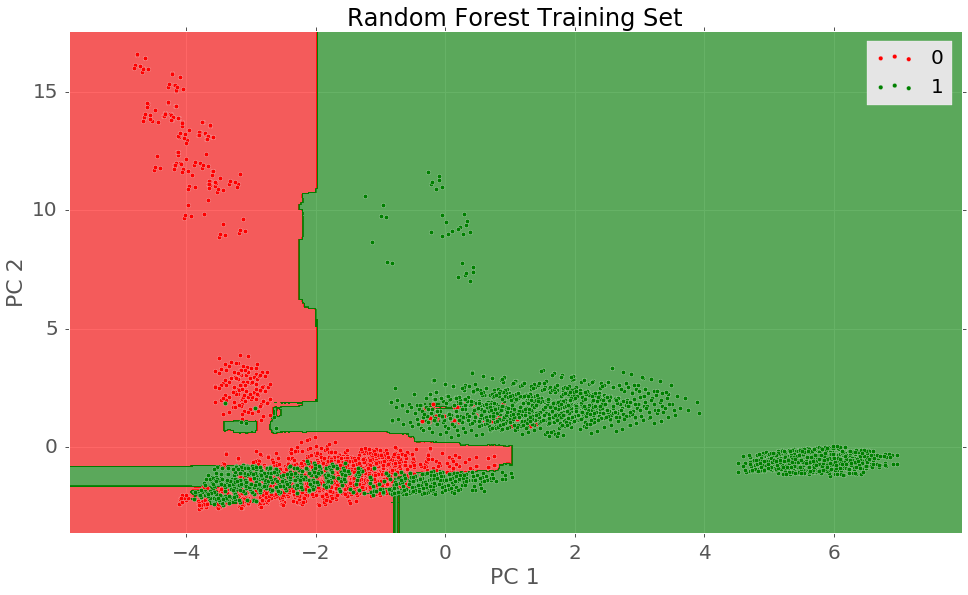

In [57]:
visualization_train('Random Forest')

## Visualising the Random Forest Testing set results

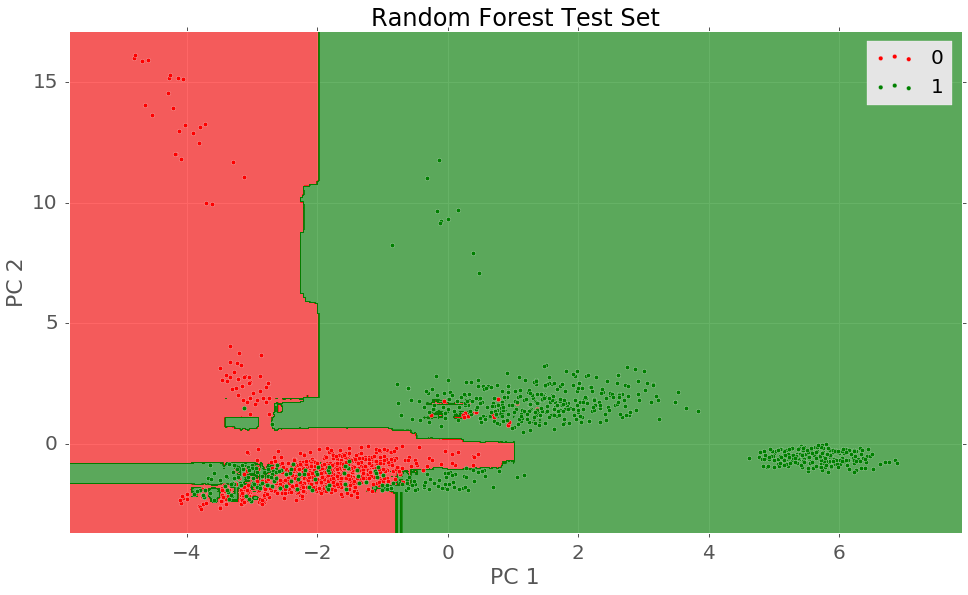

In [58]:
visualization_test('Random Forest')

# Results :
| Classifier | Logistic Reg| SVC | K-NN | Naive Bayes | Decision Tree | Random Forest |
| --- | --- | --- | --- | --- | --- | --- |
| Train accuracy score | 0.9057 | 0.9289 | 0.9430 | 0.8980 | 1.0000 | 0.9991 |
| Average accuracy score | 0.9057 | 0.9281 | 0.9314 | 0.8982 | 0.8920 | 0.9288 |
| SD | 0.0097 | 0.0112 | 0.0097 | 0.0114 | 0.0128 | 0.0106 |
| Test accuary score | 0.9028 | 0.9258 | 0.9307 | 0.8966 | 0.9016 | 0.9295 |

The above result gives the comparison of the various classification accuracies.

# THANK YOU!!